Import modules

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

Load data

In [31]:
columns = ["age", "workclass", "fnlwgt", "education", "education-num",
           "marital-status", "occupation", "relationship", "race",
           "sex", "capital-gain", "capital-loss", "hours-per-week",
           "native-country", "income"]
train_data = pd.read_csv('adult/adult.data', names=columns, sep=',\s*', engine='python')
test_data = pd.read_csv('adult/adult.test', names=columns, sep=',\s*', engine='python', skiprows=1)

categorical_cols = ["workclass", "education", "marital-status", "occupation","relationship", "race", "sex", "native-country"]
for col in categorical_cols:
    train_data[col] = LabelEncoder().fit_transform(train_data[col])
    test_data[col] = LabelEncoder().fit_transform(test_data[col])

Clean data

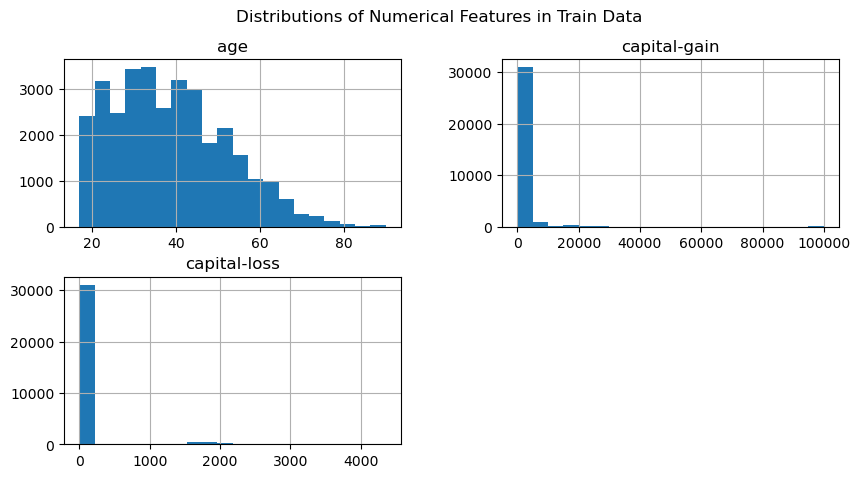

Train Income Distribution:
income
<=50K    24720
>50K      7841
Name: count, dtype: int64
Test Income Distribution:
income
<=50K    12435
>50K      3846
Name: count, dtype: int64
Unique values in train_data['workclass']: [7 6 4 1 2 0 5 8 3]
Unique values in test_data['workclass']: [4 2 0 6 1 7 5 8 3]


In [30]:
# Clean 'income' column in test_data
train_data['income'] = train_data['income'].str.replace('.', '', regex=False)
test_data['income'] = test_data['income'].str.replace('.', '', regex=False)

# Filter out rows with invalid income values
train_data = train_data[train_data['income'].isin(['>50K', '<=50K'])]
test_data = test_data[test_data['income'].isin(['>50K', '<=50K'])]

train_data[['age', 'capital-gain', 'capital-loss']].hist(bins=20, figsize=(10, 5))
plt.suptitle('Distributions of Numerical Features in Train Data')
plt.show()

print("Train Income Distribution:")
print(train_data['income'].value_counts())

print("Test Income Distribution:")
print(test_data['income'].value_counts())

print("Unique values in train_data['workclass']:", train_data['workclass'].unique())
print("Unique values in test_data['workclass']:", test_data['workclass'].unique())


# Split the Data

In [33]:
# Define features and target
X_train = train_data.drop(columns=['income'])
y_train = train_data['income'].apply(lambda x: 1 if x == '>50K' else 0)
X_test = test_data.drop(columns=['income'])
y_test = test_data['income'].apply(lambda x: 1 if x == '>50K' else 0)


# Plot distributions of your specific variables

<Figure size 1200x400 with 0 Axes>

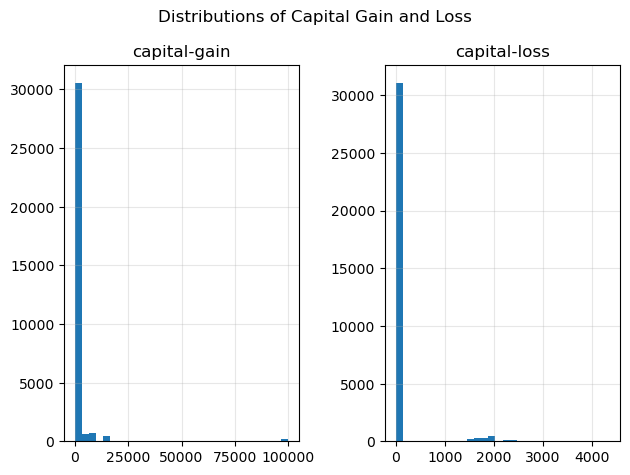

In [34]:
plt.figure(figsize=(12, 4))
train_data[['capital-gain', 'capital-loss']].hist(bins=30)
plt.suptitle('Distributions of Capital Gain and Loss')
for ax in plt.gcf().axes:
    ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Polynomial Regression on capital-gain

MSE for Polynomial Regression on capital-gain: 0.15994436582489804


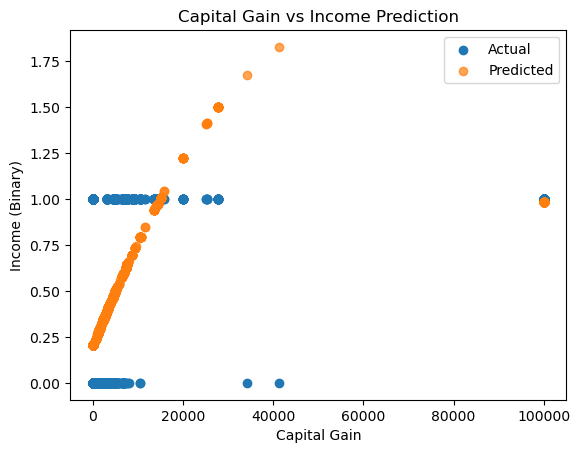

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(test_data['capital-gain'], y_test, label='Actual', alpha=0.5)
plt.scatter(test_data['capital-gain'], y_pred_gain, label='Predicted', alpha=0.5)

# Add trend line
x_trend = np.linspace(0, max(test_data['capital-gain']), 100).reshape(-1, 1)
poly = PolynomialFeatures(degree=2)
X_trend = poly.fit_transform(x_trend)
y_trend = poly_model.predict(X_trend)
plt.plot(x_trend, y_trend, 'r--', label='Trend')

plt.xlabel('Capital Gain')
plt.ylabel('Income (Binary)')
plt.title('Capital Gain vs Income Prediction')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Polynomial Regression on capital-loss

MSE for Polynomial Regression on capital-loss: 0.17675424556563812


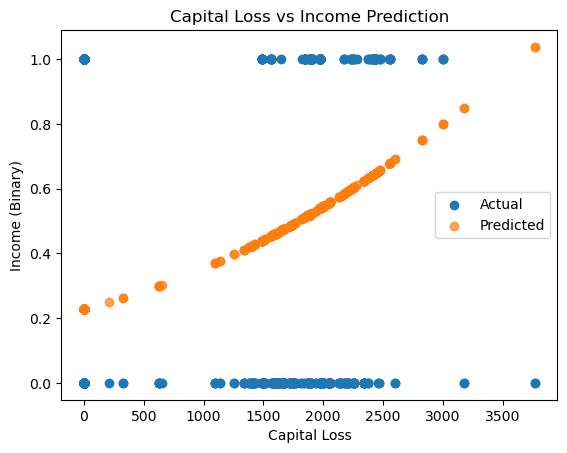

In [17]:
X_train_loss = poly.fit_transform(train_data[['capital-loss']])
X_test_loss = poly.transform(test_data[['capital-loss']])

poly_model_loss = LinearRegression()
poly_model_loss.fit(X_train_loss, y_train)
y_pred_loss = poly_model_loss.predict(X_test_loss)

mse_loss = mean_squared_error(y_test, y_pred_loss)
print(f"MSE for Polynomial Regression on capital-loss: {mse_loss}")

# Visualization for capital-loss
plt.scatter(test_data['capital-loss'], y_test, label='Actual')
plt.scatter(test_data['capital-loss'], y_pred_loss, label='Predicted', alpha=0.7)
plt.xlabel('Capital Loss')
plt.ylabel('Income (Binary)')
plt.title('Capital Loss vs Income Prediction')
plt.legend()
plt.show()

K-Nearest Neighbors for sex

Accuracy for KNN on sex: 0.7637737239727289


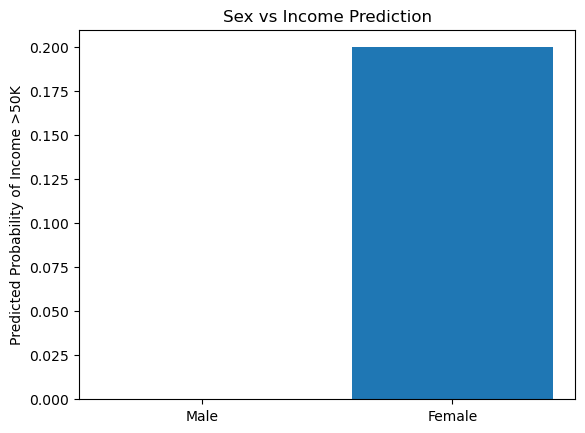

In [23]:
knn_model_sex = KNeighborsClassifier(n_neighbors=5)
knn_model_sex.fit(train_data[['sex']], y_train)
y_pred_sex = knn_model_sex.predict(test_data[['sex']])

accuracy_sex = accuracy_score(y_test, y_pred_sex)
print(f"Accuracy for KNN on sex: {accuracy_sex}")

# Visualization for sex
sex_labels = ['Male', 'Female']
sex_encoded = [0, 1]  # Assuming 0 -> Male, 1 -> Female
predicted_probs = [
    knn_model_sex.predict_proba(pd.DataFrame({'sex': [label]}))[:, 1][0]
    for label in sex_encoded
]

# Plot the probabilities
plt.bar(sex_labels, predicted_probs)
plt.ylabel('Predicted Probability of Income >50K')
plt.title('Sex vs Income Prediction')
plt.show()

Logistic Regression for workclass

Accuracy for Logistic Regression on workclass: 0.7637737239727289


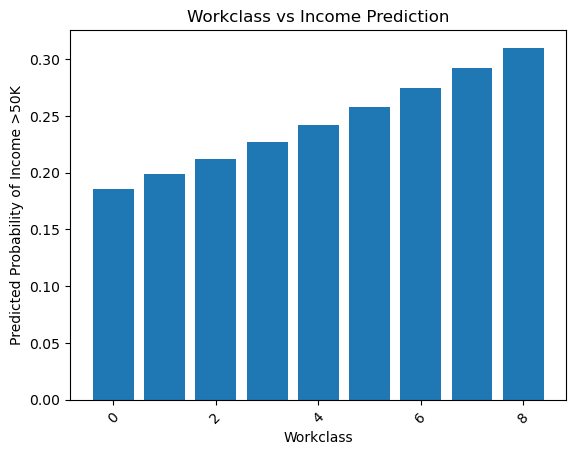

In [ ]:
workclass_mapping = {
    0: 'Private', 
    1: 'Self-emp-not-inc',
    2: 'Self-emp-inc', 
    3: 'Federal-gov',
    4: 'Local-gov', 
    5: 'State-gov',
    6: 'Without-pay', 
    7: 'Never-worked',
    8: 'Other'
}

plt.figure(figsize=(12, 6))
workclass_probs = [logreg_model.predict_proba(pd.DataFrame({'workclass': [label]}))[:, 1][0]
                   for label in sorted(workclass_mapping.keys())]

bars = plt.bar(range(len(workclass_mapping)), workclass_probs)
plt.xticks(range(len(workclass_mapping)), 
          [workclass_mapping[i] for i in sorted(workclass_mapping.keys())],
          rotation=45, ha='right')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

plt.xlabel('Workclass')
plt.ylabel('Predicted Probability of Income >50K')
plt.title('Workclass vs Income Prediction')
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()
